In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [9]:
df = pd.read_csv("caspecoHistoricalDataProcessed.csv")

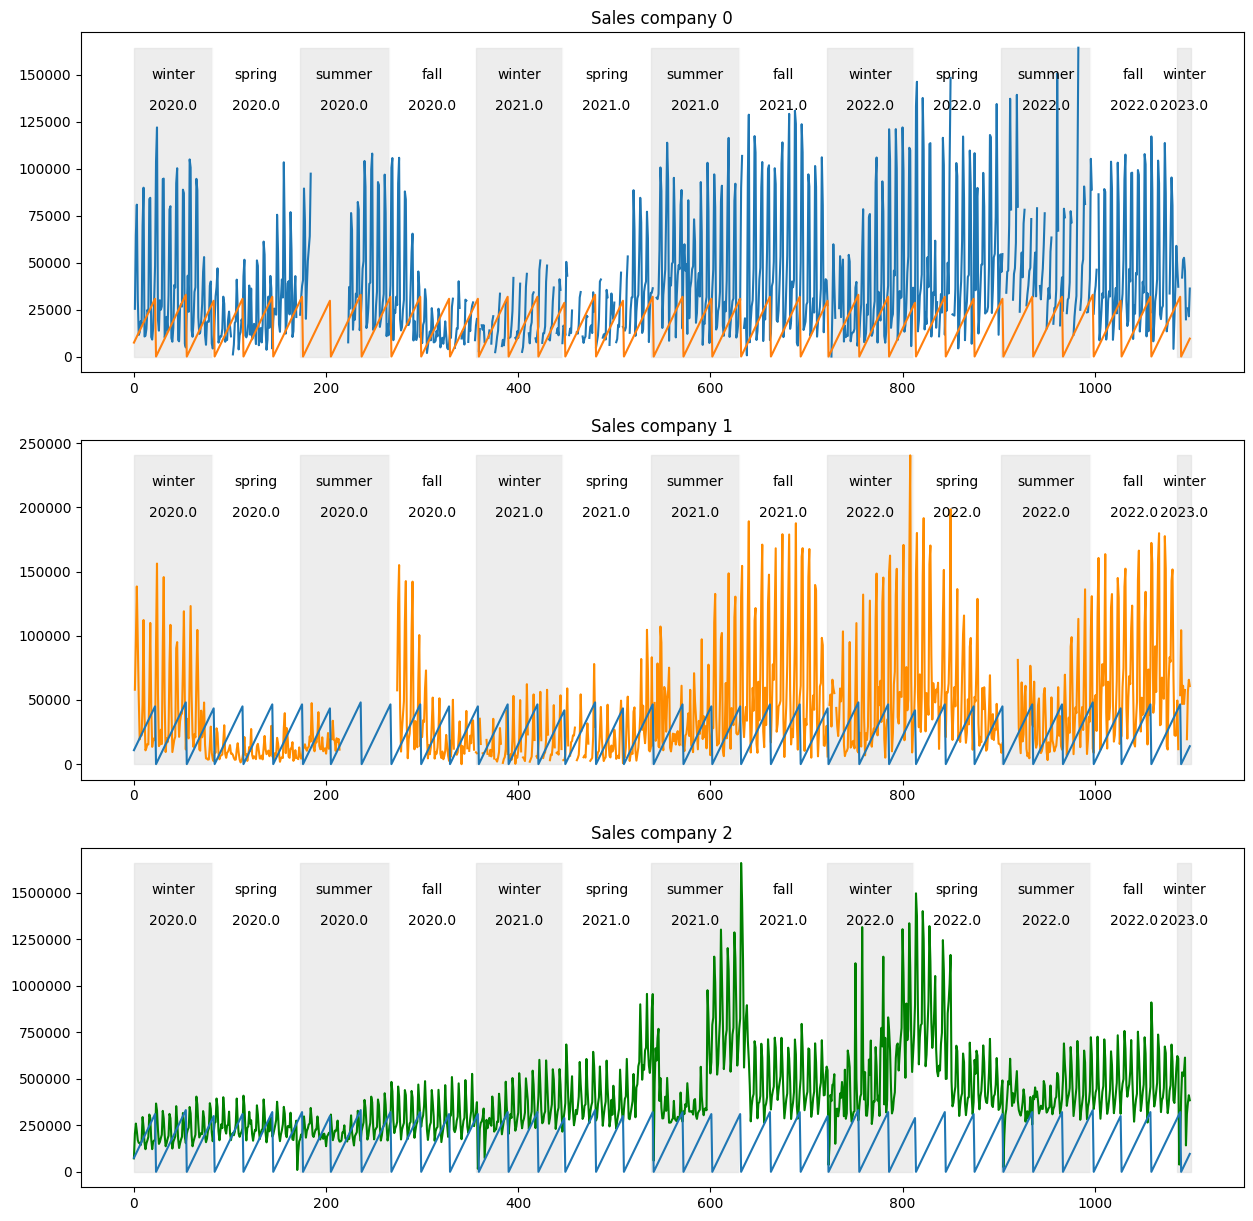

In [18]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout()

simple_seasons = [
    len(pd.date_range(start = "2020-01-01", end = "2020-03-21")),
    len(pd.date_range(start = "2020-03-22", end = "2020-06-21")),
    len(pd.date_range(start = "2020-06-22", end = "2020-09-21")),
    len(pd.date_range(start = "2020-09-22", end = "2020-12-21")),
    len(pd.date_range(start = "2020-12-22", end = "2021-03-21")),
    len(pd.date_range(start = "2021-03-22", end = "2021-06-21")),
    len(pd.date_range(start = "2021-06-22", end = "2021-09-21")),
    len(pd.date_range(start = "2021-09-22", end = "2021-12-21")),
    len(pd.date_range(start = "2021-12-22", end = "2022-03-21")),
    len(pd.date_range(start = "2022-03-22", end = "2022-06-21")),
    len(pd.date_range(start = "2022-06-22", end = "2022-09-21")),
    len(pd.date_range(start = "2022-09-22", end = "2022-12-21")),
    len(pd.date_range(start = "2022-12-22", end = "2023-01-04"))
]
seasons = simple_seasons

for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.set_title(f"Sales company {i}")
    ax.ticklabel_format(style = "plain")
    
    sales = df[df["Company"] == i]["Sales"]
    max_sales = np.max(sales, axis=0).astype(int)
    
    dx = 0
    for l in range(len(seasons)):
        if (l + 1) % 4 == 1:
            color = "gainsboro"
            label = "winter"
        elif (l + 1) % 4 == 2:
            color = "white"
            label = "spring"
        elif (l + 1) % 4 == 3:
            color = "gainsboro"
            label = "summer"
        elif (l + 1) % 4 == 0:
            color = "white"
            label = "fall"
        
        ax.text(dx + seasons[l]/2, max_sales * 0.9, label, horizontalalignment = "center")
        ax.text(dx + seasons[l]/2, max_sales * 0.8, 2020 + np.floor(l/4), horizontalalignment = "center")
        #if l % 2 == 0:
        ax.add_patch(Rectangle((dx, 0), seasons[l], max_sales, alpha = 0.5, color = color))
        dx += seasons[l]
    
    line_color = ""
    if i == 1:
        line_color = "darkorange"
    elif i == 2:
        line_color = "green"
    ax.plot(range(len(sales)), sales, line_color)
    # use this line to compare with these since salary, it can be seen this indeed has an influence on sales
    #ax.plot(range(len(sales)), df[df["Company"] == i]["DaysSinceSalary"] / 31 * max_sales * 0.2)
    

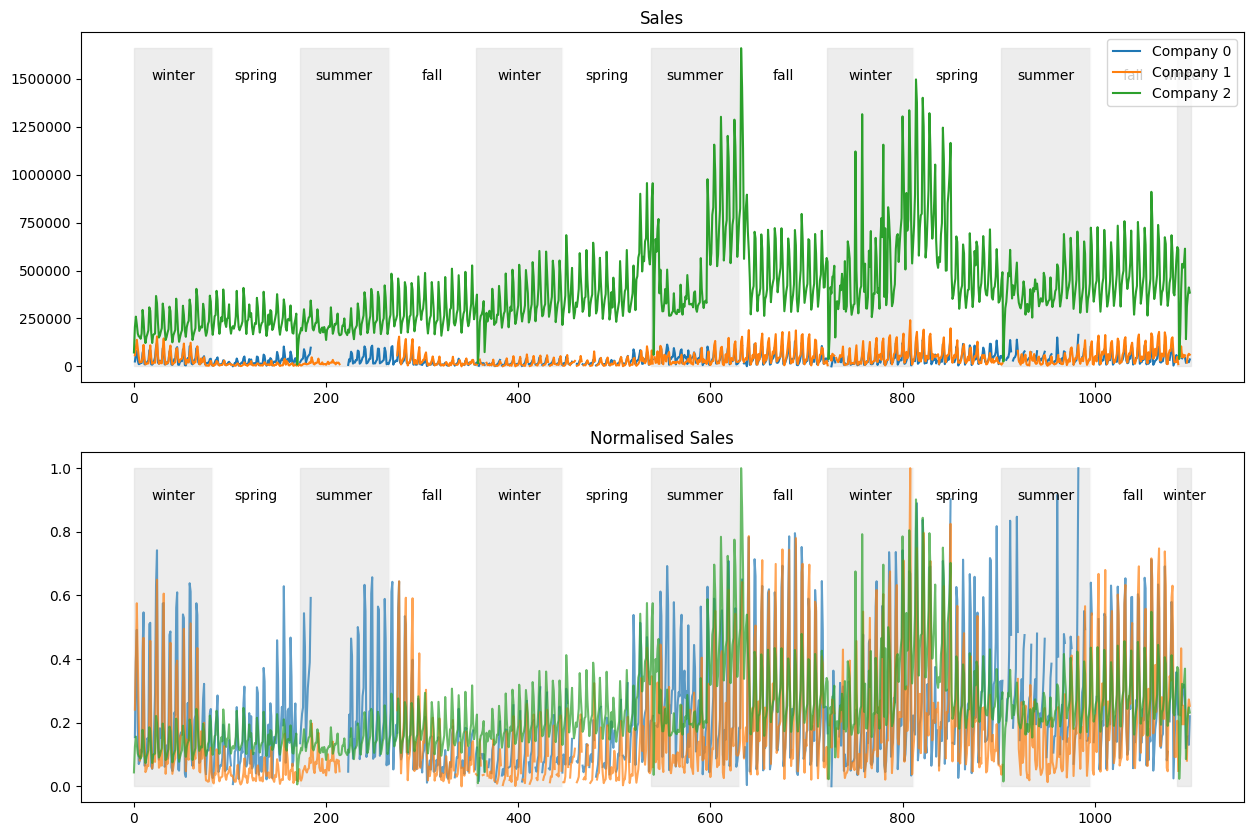

In [6]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()

for i in range(2):
    ax = fig.add_subplot(2, 1, i + 1)
    ax.set_title(("Normalised " if i == 1 else "") + "Sales")
    ax.ticklabel_format(style = "plain")
    
    max_sales = np.max(df["Sales"], axis = 0).astype(int)
    if i == 1:
        max_sales = 1
    
    dx = 0
    for l in range(len(seasons)):
        if (l + 1) % 4 == 1:
            color = "gainsboro"
            label = "winter"
        elif (l + 1) % 4 == 2:
            color = "white"
            label = "spring"
        elif (l + 1) % 4 == 3:
            color = "gainsboro"
            label = "summer"
        elif (l + 1) % 4 == 0:
            color = "white"
            label = "fall"
        
        ax.text(dx + seasons[l]/2, max_sales * 0.9, label, horizontalalignment = "center")
        ax.add_patch(Rectangle((dx, 0), seasons[l], max_sales, alpha = 0.5, color = color))
        dx += seasons[l]
        
    for l in range(3):
        sales = df[df["Company"] == l]["Sales"]
        max_sales = np.max(sales, axis = 0).astype(int)
        opacity = 1
        
        if i == 1:
            sales = sales / max_sales
            opacity = 0.7
    
        ax.plot(range(len(sales)), sales, alpha = opacity, label=f"Company {l}")
        
    if i == 0:
        ax.legend()